In [2]:
dir = "/Users/wciezobka/sano/projects/masters-thesis/Results/lime/20240410-164742_LTP/explanations"

import glob
import os
import numpy as np
import matplotlib.pylab as plt
import sklearn
import scipy.stats
import networkx as nx
from surfplot import Plot


In [3]:
files = glob.glob(dir+"/*")
xs_stroke = np.array([np.load(f) for f in glob.glob(dir+"/*PAT*")])
xs_control = np.array([np.load(f) for f in glob.glob(dir+"/*CON*")])

In [4]:
xs_stroke_abs = np.abs(xs_stroke)
xs_control_abs = np.abs(xs_control)

 ...done. (3 seconds, 0 min)
Extracting data from /Users/wciezobka/brainstat_data/parcellation_data/3209672cc6bb68fc4399aea2c986fd11/atl-schaefer2018.tar.gz..... done.
/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_5642/3129730903.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


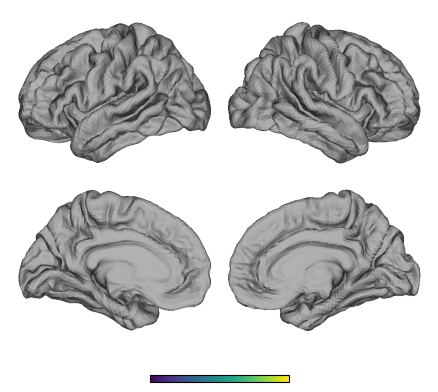

In [5]:
import brainstat
import brainstat.datasets
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
schaefer = brainstat.datasets.fetch_parcellation('fsaverage5','schaefer',100)
lh, rh = brainstat.datasets.fetch_template_surface('fsaverage5', join=False)

th = 0.002

# control positive
assignment = xs_control.sum(axis=0)>=th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


(100,)


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_5642/1396432732.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


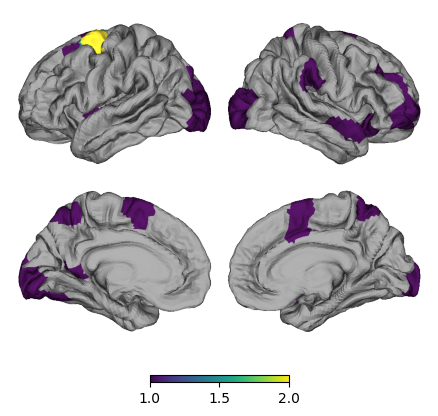

In [13]:
# stroke positive
assignment = xs_stroke.sum(axis=0)>=th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()

/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_5642/525516148.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


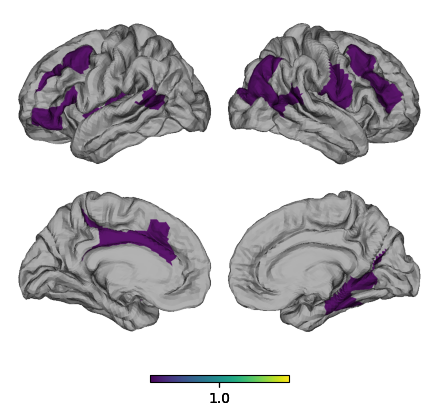

In [7]:
# control negative
assignment = xs_control.sum(axis=0)<=-th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


Exploring the connectivity matrices

/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_5642/684552190.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


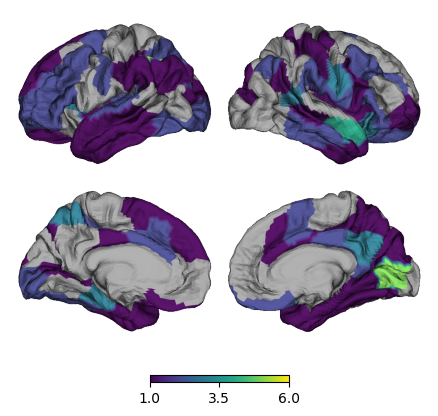

In [8]:
# stroke negative
assignment = xs_stroke.sum(axis=0)<=-th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_5642/3196549785.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


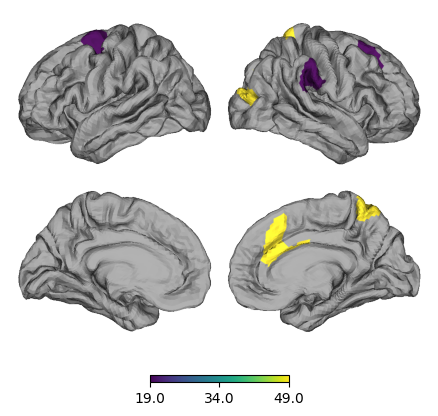

In [9]:
th = 0.002
assignment = xs_stroke.sum(axis=0)>=th
ccs = nx.community.louvain_communities(nx.from_numpy_array(assignment, create_using=nx.DiGraph))

to_plot = np.zeros((100,))
for i, c in enumerate(ccs):
    for n in c:
        if len(c) >= 3:
            to_plot[n] = i
        else:
            to_plot[n] = 0
to_plot_surface = map_to_labels(to_plot, schaefer, mask=schaefer!=0, fill=np.nan)
xx=to_plot_surface
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


In [12]:
xs_stroke.shape

(69, 100, 100)

/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_5642/237814462.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


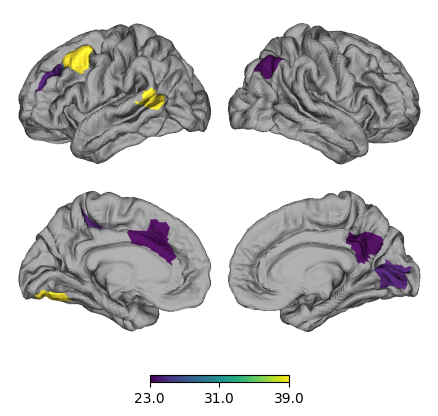

In [10]:
th = 0.002
assignment = xs_control.sum(axis=0)<=-th
ccs = nx.community.louvain_communities(nx.from_numpy_array(assignment, create_using=nx.DiGraph))

to_plot = np.zeros((100,))
for i, c in enumerate(ccs):
    for n in c:
        if len(c) >= 3:
            to_plot[n] = i
        else:
            to_plot[n] = 0
to_plot_surface = map_to_labels(to_plot, schaefer, mask=schaefer!=0, fill=np.nan)
xx=to_plot_surface
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()